Columns in dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Target variable distribution:
y
no     4000
yes     521
Name: count, dtype: int64

Accuracy: 0.8806629834254144

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.93       807
        True       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905


Confusion Matrix:
 [[748  59]
 [ 49  49]]


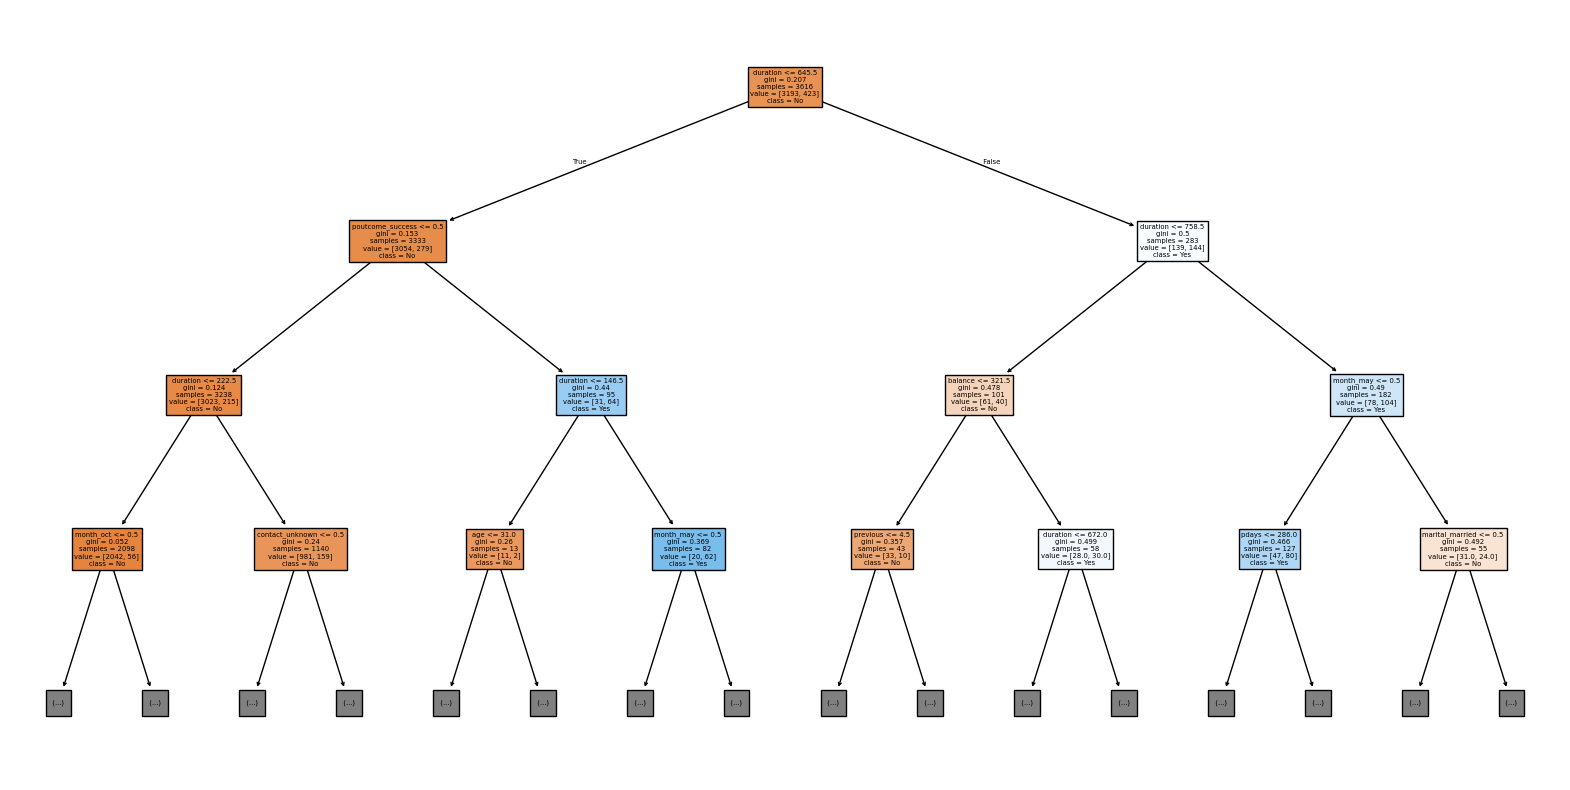

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("/content/bank.csv", sep=';')

print("Columns in dataset:")
print(df.columns)
print("\nTarget variable distribution:")
print(df['y'].value_counts())

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    max_depth=3
)
plt.show()
